# Chapter 5: Decision Trees

In [19]:
%reset
low_memory=False

import pandas as pd
import matplotlib.pyplot as plt
import imblearn

import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 5.1 Introduction & Motivation

We have already seen a first classification model. However, There are plenty more models we can work with. One of these is Decision Trees. In decision trees we starting at the root and create leaves or $nodes$ by asking questions. For example when predicting an animal type this could be 'Does the animal have a tail?'. For each node we ask aditional questions.

## 5.2 Problem Setting

When it comes to wine, there are various degrees of quality. Some people are experts in this field, others pretend to be. Today we are going to try and beat the experts by predicting the exact quality of wine based on its features. This quality can range from 0 up to 10 where 0 is the lowest quality and 10 is the highest quality.

## 5.3 Model


First, let's have a look at the data.

In [20]:
import pandas as pd
df = pd.read_csv("Wine.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


##### Question 1: Consider the data above. Are there columns that will not add any value to our model? Elaborate and drop those columns.

In [21]:
df = df.drop(columns=['Id'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Question 2: Just as always, explore the data by creating a heatmap. Which variables would you expect to have the highest impact on quality and which ones would you expect to have the lowest impact? Why?

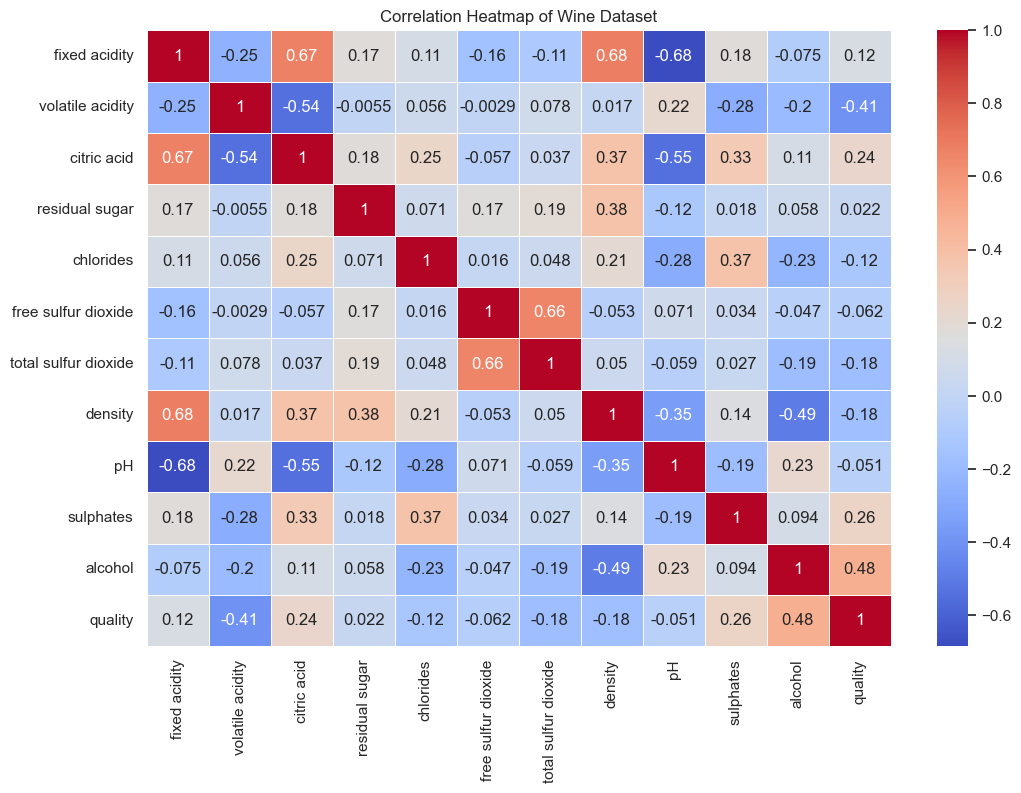

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
#print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Dataset')
plt.show()



##### Question 3: Create a train and test split of the data. Keep 30% of your data as testing data. Build your model using all data except the columns you droped during question 1.

In [34]:
X = df.drop(columns=['quality']) 
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier()
tree_fit = tree.fit(X_train, y_train)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (799, 11)
X_test shape: (343, 11)
y_train shape: (799,)
y_test shape: (343,)


##### Question 4: Consider a bottle of wine below. What would be the quality of this wine?

| fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | Id |
| --- | --- | --- |--- | --- | --- | --- | --- | --- | --- | --- | --- |
| 5.9 | 0.645 | 0.12 | 2.0 | 0.075 | 32.0 | 44.0 | 0.9954 | 3.57 | 0.71 | 10.2 | 178 |

In [36]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
model = RandomForestClassifier(random_state=0)

model.fit(X_train, y_train)

wine_features = np.array([[5.9, 0.645, 0.12, 2.0, 0.075, 32.0, 44.0, 0.9954, 3.57, 0.71, 10.2]])

predicted_quality = model.predict(wine_features)

print("Predicted quality of the wine:", predicted_quality[0])


Predicted quality of the wine: 5


C:\Users\MOHAMMAD MIRAZ\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 5.4 Model Evaluation

Of course our predictions don't mean anything without knowing how good they are. Let's explore this.

##### Question 5: Calculate accuracy and precision for your model. Are these values any good? Elaborate based on the formulas and meaning of the metrics.

##### Question 6: Plot the confuson matrix. How can you visually confirm your previous findings?

##### Question 7: Think back to the introdcution of this dataset. Does the confusion matrix make sense? Do the labels actually mean what you assume they mean? Explore the predictions and read the documentation to figure it what is going on and how to properly interpret the confusion matrix.

*Hint: pandas might have some useful methods to analyse a single column*

## 5.5 Questions

##### Question 1: See section 5.3

##### Question 2: See section 5.3

##### Question 3: See section 5.3

##### Question 4: See section 5.3

##### Question 5: See section 5.4

##### Question 6: See section 5.4

##### Question 7: See section 5.4

##### Question 8: We know our decision tree model works by creating different nodes. Just how many nodes are we creating? Experiment a bit (or google it/ask chatGPT if you are lazy :P) to find this out.

##### Question 9: While our model does its best, this may not be the ideal amount of nodes. train your model on a range of different node depts using the parameter 'max_depth' and calculate the accuracy for each max depth. Plot the scores and find the best depth. Retrain your model using this depth and report on the accuracy/precision.

##### Question 10: How would you detect overfitting in classification? Do this check for all models you tested in question 8 and plot the results. Would you choose a different max_depth now?

##### Question 11: A variant of Decision trees is called 'Random Forest'. In random forest, we create a number of decision trees who each make a prediction and take the average outcome. For classification, this is the outcome that occurs the most over all decision trees. Based on the [documentation](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) (or you can experiment yourself, it is very similar to decision trees so I'm sure you can figure it out!) create a model for a random forest and report on the accuracy/precision.

##### Question 12: Would a randomforest be more or less prone to overfitting than a decision tree? Study up on the exact workings of a random forest and elaborate.